# LangGraph Agent
## Without tools

## Library Imports

In [1]:
from langchain_core.messages import HumanMessage
# from langchain_anthropic import ChatAnthropic  <-- REMOVE THIS
from langchain_google_genai import ChatGoogleGenerativeAI  # <-- ADD THIS
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import END, START, StateGraph, MessagesState
import logging
from IPython.display import Image, Markdown, display
from langchain_core.runnables.graph import CurveStyle, MermaidDrawMethod, NodeStyles
import os  # <-- ADD THIS

## Configure logging

In [2]:
for handler in logging.root.handlers[:]:
    logging.root.removeHandler(handler)

logging.basicConfig(
    filename='langgraph_notebook.log',  
    level=logging.INFO,
)

In [3]:
import os

# --- API Key Configuration ---
# IMPORTANT: For security, add your GOOGLE_API_KEY as a secret
# in your GitHub Codespace settings.
# The code will automatically read it from the environment.
if "GOOGLE_API_KEY" not in os.environ:
    print("Warning: GOOGLE_API_KEY not set. Please set it as a Codespace secret.")
    # You can temporarily set it here for testing, but DO NOT commit this file:
    # os.environ["GOOGLE_API_KEY"] = "YOUR_API_KEY_HERE"

# --- Model Definition ---
# model = ChatAnthropic(model="claude-3-5-sonnet-20240620", temperature=0) # <-- REMOVE THIS
model = ChatGoogleGenerativeAI(model="gemini-2.5-pro", temperature=0) # <-- ADD THIS

# ▼▼▼ ALL THE CODE BELOW THIS LINE REMAINS THE SAME ▼▼▼

def call_model(state: MessagesState):
    messages = state['messages']
    response = model.invoke(messages)
    return {"messages": [response]}

workflow = StateGraph(MessagesState)

workflow.add_node("agent", call_model)

workflow.add_edge(START, "agent")

checkpointer = MemorySaver()

app = workflow.compile(checkpointer=checkpointer)

## Visualize the Graph

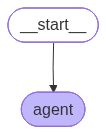

In [4]:
display(
    Image(
        app.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)

In [6]:
final_state = app.invoke(
    {"messages": [HumanMessage(content="What teams did Joe Montana play for?")]},
    config={"configurable": {"thread_id": 99}}
)
display(Markdown(final_state["messages"][-1].content))

Joe Montana played for two NFL teams during his legendary career:

1.  **San Francisco 49ers** (1979–1992)
    *   This is the team where he became an icon. He led the 49ers to four Super Bowl victories (XVI, XIX, XXIII, XXIV) and was named Super Bowl MVP three times.

2.  **Kansas City Chiefs** (1993–1994)
    *   After a trade from San Francisco, he finished his career with the Chiefs, leading them to the AFC Championship Game in his first season with the team. He retired after the 1994 season.

In [9]:
final_state = app.invoke(
    {"messages": [HumanMessage(content="What are the leagues in the SportsWorldCentral fantasy football platform?")]},
    config={"configurable": {"thread_id": 99}}
)
display(Markdown(final_state["messages"][-1].content))

That's an interesting question! It appears that **"SportsWorldCentral" is not a real or known fantasy football platform.**

It's possible you may be thinking of a different site, or it might be a fictional platform from a show, book, or game. The major, real-world fantasy football platforms include:

*   **ESPN Fantasy**
*   **Yahoo Fantasy Sports**
*   **Sleeper**
*   **NFL.com Fantasy**
*   **CBS Sports Fantasy**
*   **Fleaflicker**

However, if you're asking about the *types* of leagues that are typically available on these platforms, they generally fall into these common categories:

### Common Types of Fantasy Football Leagues

**1. Based on Scoring Rules:**
*   **Standard (or Non-PPR):** Players only get points for yards and touchdowns. Receptions are not awarded points.
*   **PPR (Point Per Reception):** In addition to yards and touchdowns, players (usually WRs, RBs, and TEs) get a full point for every catch they make.
*   **Half-PPR:** A popular middle ground where players receive half a point (0.5) for every reception.
*   **Best Ball:** A draft-only format. You draft your team, and the platform automatically sets your optimal lineup each week based on who scored the most points. There are no in-season moves like trades or waiver claims.
*   **IDP (Individual Defensive Player):** Instead of a team defense (D/ST), you draft individual defensive players (like linebackers, defensive ends, etc.) who score points for tackles, sacks, and interceptions.
*   **Superflex/2QB:** These leagues have a "flex" position where you can start a quarterback, making QBs much more valuable and changing draft strategy significantly.

**2. Based on Roster Management:**
*   **Redraft:** This is the most common type. You draft a new team from scratch every single year.
*   **Keeper:** At the end of the season, you can "keep" a certain number of players from your roster to be on your team the following year, usually at the cost of a draft pick.
*   **Dynasty:** The most intensive format. You keep your entire roster from year to year, and the annual draft is only for incoming NFL rookies. It's like being a real NFL General Manager.

**3. Based on How You Join:**
*   **Public Leagues:** Open to anyone on the platform. The platform randomly places you in a league with other strangers.
*   **Private Leagues:** The most popular option for playing with friends, family, or coworkers. A commissioner creates the league and sends out private invitations to join.

If you can recall a different name for the platform, I'd be happy to give you more specific information

In [10]:
final_state = app.invoke(
    {"messages": [HumanMessage(content="What are the leagues in the MyFantasyLeague fantasy football platform?")]},
    config={"configurable": {"thread_id": 99}}
)
display(Markdown(final_state["messages"][-1].content))

Excellent question. Unlike platforms like ESPN or Yahoo, which offer standardized public leagues, **MyFantasyLeague (MFL) operates differently.**

Instead of having its own named leagues (like "The MFL Pro League"), MFL is a highly customizable platform that serves as a "sandbox" for commissioners to create and run their own unique leagues. Think of it less as a restaurant with a set menu and more as a professional kitchen where you can cook whatever you want.

So, the answer to "What are the leagues in MyFantasyLeague?" is: **Whatever leagues its users can imagine and create.**

Here’s a breakdown of the types of leagues that MFL is famous for hosting, which is likely what you're looking for:

### 1. The Core of MFL: Complex, Long-Term Leagues

MFL is the go-to platform for serious fantasy players who want deep, complex formats that free sites can't support.

*   **Dynasty Leagues:** This is MFL's bread and butter. In a dynasty league, you keep your entire roster from year to year. MFL excels here because it supports year-round access, multi-year draft pick trading, complex rookie drafts, and detailed historical tracking.
*   **Keeper Leagues:** A less intense version of dynasty where you keep a set number of players each year. MFL's customization allows for complex keeper rules, like associating draft pick costs with players.
*   **Salary Cap & Contract Leagues:** These are the most advanced formats. Commissioners can assign fictional salaries and contract lengths to players. Owners must manage a team budget, deal with expiring contracts, and handle things like franchise tags—mimicking a real NFL front office. MFL is one of the few platforms that can handle this level of detail.

### 2. Advanced Scoring and Roster Formats

MFL's customization allows for virtually any scoring or roster setup you can think of.

*   **IDP (Individual Defensive Player) Leagues:** While other sites have basic IDP, MFL allows for incredibly deep and nuanced scoring. You can have different scoring for a defensive tackle versus a cornerback and use a large number of defensive roster spots.
*   **Superflex / 2QB Leagues:** Easily supports formats where starting a second quarterback is possible, dramatically changing player values.
*   **Auction Leagues:** MFL has a robust and reliable auction draft module that is highly customizable.
*   **Empire Leagues:** A type of dynasty league where the league ends and the prize pot is awarded only when one owner wins the championship two years in a row (or some other set condition).

### 3. Finding a League on MFL

Since MFL doesn't offer standard "public leagues" to join, you have to find one that is looking for new owners.

*   **League Openings Forum:** The MFL website has a dedicated message board called **"League Openings"** where commissioners post advertisements for their leagues. They will detail the scoring, rules, buy-in, and what kind of owner they are looking for. This is the primary way to find a team on the platform.
*   **Orphan Teams:** Many of the openings are for "orphan teams"—teams in existing dynasty or keeper leagues that were abandoned by their previous owner. Taking over an orphan can be a fun challenge of rebuilding a roster.

### A Note on MFL's Past Contests (MFL10s)

For many years, MFL was famous for its own public contests called **MFL10s**. These were "best ball" leagues (draft-only, no in-season management) with a $10 entry fee. However, these contests were discontinued several years ago after MFL was acquired. The best ball format is now primarily found on other sites like **Underdog Fantasy** and **DraftKings**.

**In summary: MyFantasyLeague doesn't have its own set leagues. It is a powerful, commissioner-centric platform used to build and host highly customized fantasy football leagues, especially Dynasty, Keeper, and Salary Cap formats.**

“pip install swcpy@git+https://github.com/handsonapibook/api-book-part-one#subdirectory=chapter7/complete/sdk

”

Excerpt From
Hands-On APIs for AI and Data Science
Ryan Day
This material may be protected by copyright.